<a href="https://colab.research.google.com/github/hassanme/FUTURE_ML_01/blob/main/Copy_of_AAPLdata3_RF_ANN_Tuned_hassan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

random forest with Final RELU ACTIAVTION FUNCTION

In [ ]:
  import yfinance as yf

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# stock ticker and the date range
ticker = 'AAPL'
start_date = '2000-01-01'
end_date = '2024-12-31'

# Downloading stock data using yfinance
AAPL_data = yf.download(ticker, start=start_date, end=end_date)

AAPL_data.to_csv('AAPL_stock_data.csv')

print("Data saved to AAPL_stock_data.csv")


[*********************100%***********************]  1 of 1 completed


Data saved to AAPL_stock_data.csv


In [ ]:
print(AAPL_data.head())


Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2000-01-03  0.843076  0.847312  0.765876  0.789884  535796800
2000-01-04  0.771997  0.833191  0.762111  0.815303  512377600
2000-01-05  0.783294  0.832720  0.775762  0.781411  778321600
2000-01-06  0.715508  0.805889  0.715508  0.799299  767972800
2000-01-07  0.749402  0.760699  0.719275  0.726806  460734400


In [ ]:

# Load the CSV file
file_path = '/content/AAPL_stock_data.csv'
data = pd.read_csv(file_path)

data = data.drop([0, 1])

data.columns = ['Date'] + list(data.columns[1:])

modified_file_path = 'updated_AAPL_stock_data.csv'
data.to_csv(modified_file_path, index=False)

print(f"File saved as {modified_file_path}")

updated_AAPL_stock_data = pd.read_csv(modified_file_path)

print(updated_AAPL_stock_data.head())


File saved as updated_AAPL_stock_data.csv
         Date     Close      High       Low      Open     Volume
0  2000-01-03  0.843076  0.847312  0.765876  0.789884  535796800
1  2000-01-04  0.771997  0.833191  0.762111  0.815303  512377600
2  2000-01-05  0.783294  0.832720  0.775762  0.781411  778321600
3  2000-01-06  0.715508  0.805889  0.715508  0.799299  767972800
4  2000-01-07  0.749402  0.760699  0.719275  0.726806  460734400


In [ ]:

file_path = '/content/updated_AAPL_stock_data.csv'
AAPL_data = pd.read_csv(file_path)

# Set the "Date" column as the index
AAPL_data.set_index('Date', inplace=True)


modified_file_path = 'AAPL_stock_data_with_date_index.csv'
AAPL_data.to_csv(modified_file_path)

print(f"File saved as {modified_file_path}")


File saved as AAPL_stock_data_with_date_index.csv


**DATA VISUALIZATION**

In [ ]:
AAPL_data.shape

(6288, 5)

In [ ]:
AAPL_data.describe()

,Close,High,Low,Open,Volume
count,6288.000000,6288.000000,6288.000000,6288.000000,6.288000e+03
mean,41.259566,41.664464,40.811865,41.225886,3.859756e+08
std,60.176970,60.739684,59.536876,60.109143,3.837401e+08
min,0.197631,0.198686,0.191606,0.195673,2.323470e+07
25%,2.015400,2.045677,1.973750,2.017359,1.156431e+08
50%,13.842418,13.987040,13.727821,13.875616,2.680342e+08
75%,44.212401,44.542007,43.862654,44.187508,5.183500e+08
max,259.019989,260.100006,257.630005,258.190002,7.421641e+09


In [ ]:
AAPL_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6288 entries, 2000-01-03 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6288 non-null   float64
 1   High    6288 non-null   float64
 2   Low     6288 non-null   float64
 3   Open    6288 non-null   float64
 4   Volume  6288 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 294.8+ KB


In [ ]:
AAPL_data.isna().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


Text(0.5, 1.0, 'Adj Closing price of AAPL data')

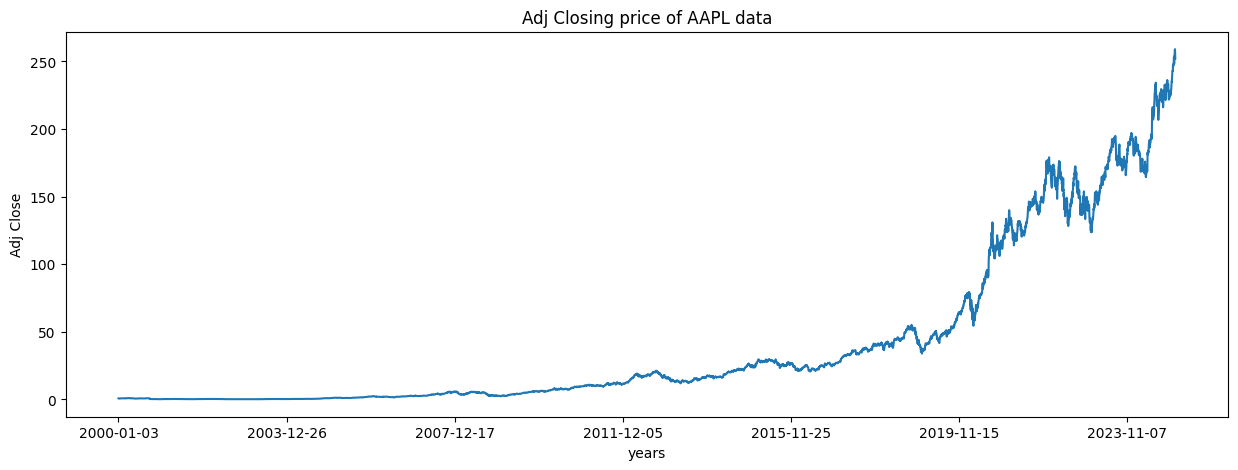

In [ ]:
plt.figure(figsize = (15,5))
# Check if 'Adj Close' exists, if not, use 'Close'
AAPL_data['Adj Close' if 'Adj Close' in AAPL_data.columns else 'Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Adj Closing price of AAPL data")

In [ ]:
plt.figure(figsize = (15,5))
AAPL_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Adj Closing price of AAPL data")

KeyError: 'Adj Close'

<Figure size 1500x500 with 0 Axes>

In [ ]:
AAPL_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

**Feature Engineering**

In [ ]:
def calculate_RSI(data, window=14):

    delta = data['Adj Close'].diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(span=window, min_periods=1, adjust=False).mean()
    avg_loss = loss.ewm(span=window, min_periods=1, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

file_path = '/content/AAPL_stock_data_with_date_index.csv'
AAPL_data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

AAPL_data['RSI_10'] = calculate_RSI(AAPL_data, window=10)
AAPL_data['RSI_14'] = calculate_RSI(AAPL_data, window=14)
AAPL_data['RSI_20'] = calculate_RSI(AAPL_data, window=20)

output_file = 'AAPL_stock_data_TI_with_TIs.csv'
AAPL_data.to_csv(output_file)

print(f"RSI (10-day, 14-day, and 20-day) added and saved to {output_file}")



KeyError: 'Adj Close'

In [ ]:
def calculate_RSI(data, window=14, price_column='Close'): # Changed 'Adj Close' to 'Close'

    delta = data[price_column].diff() # Use price_column instead of 'Adj Close'

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(span=window, min_periods=1, adjust=False).mean()
    avg_loss = loss.ewm(span=window, min_periods=1, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

file_path = '/content/AAPL_stock_data_with_date_index.csv'
AAPL_data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

AAPL_data['RSI_10'] = calculate_RSI(AAPL_data, window=10, price_column='Close') # Pass 'Close' as price_column
AAPL_data['RSI_14'] = calculate_RSI(AAPL_data, window=14, price_column='Close') # Pass 'Close' as price_column
AAPL_data['RSI_20'] = calculate_RSI(AAPL_data, window=20, price_column='Close') # Pass 'Close' as price_column

output_file = 'AAPL_stock_data_TI_with_TIs.csv'
AAPL_data.to_csv(output_file)

print(f"RSI (10-day, 14-day, and 20-day) added and saved to {output_file}")

RSI (10-day, 14-day, and 20-day) added and saved to AAPL_stock_data_TI_with_TIs.csv


In [ ]:
print(AAPL_data.head())


               Close      High       Low      Open     Volume     RSI_10  \
Date                                                                       
2000-01-03  0.843077  0.847313  0.765877  0.789884  535796800        NaN   
2000-01-04  0.771997  0.833191  0.762111  0.815304  512377600   0.000000   
2000-01-05  0.783293  0.832720  0.775762  0.781410  778321600  16.265030   
2000-01-06  0.715508  0.805889  0.715508  0.799299  767972800   7.417232   
2000-01-07  0.749401  0.760699  0.719275  0.726806  460734400  30.516119   

               RSI_14     RSI_20  
Date                              
2000-01-03        NaN        NaN  
2000-01-04   0.000000   0.000000  
2000-01-05  15.496102  14.941120  
2000-01-06   7.475572   7.504644  
2000-01-07  28.751207  27.457993  


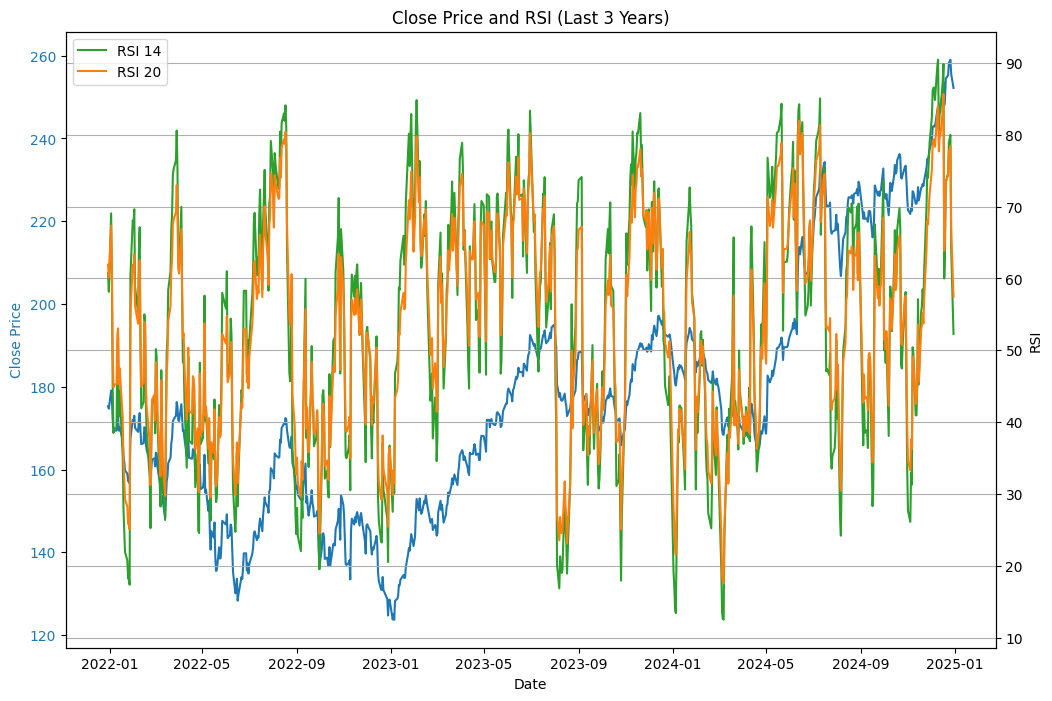

In [ ]:
last_3_years_data = AAPL_data.loc[AAPL_data.index >= AAPL_data.index.max() - pd.DateOffset(years=3)]

fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color) # Changed 'Adjusted Close Price' to 'Close Price'
ax1.plot(last_3_years_data.index, last_3_years_data['Close'], color=color) # Changed 'Adj Close' to 'Close'
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.plot(last_3_years_data.index, last_3_years_data['RSI_14'], color=color, label='RSI 14')

color = 'tab:orange'
ax2.plot(last_3_years_data.index, last_3_years_data['RSI_20'], color=color, label='RSI 20')

ax2.set_ylabel('RSI', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Close Price and RSI (Last 3 Years)') # Changed 'Adjusted Close Price' to 'Close Price'
plt.grid(True)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

KeyError: 'Adj Close'

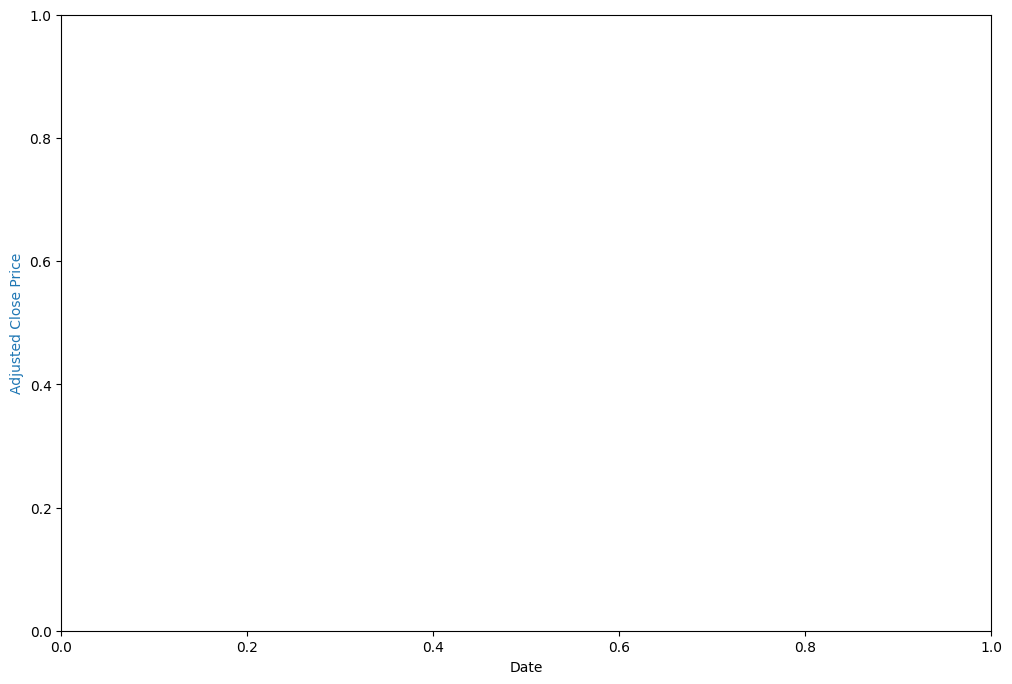

In [ ]:
last_3_years_data = AAPL_data.loc[AAPL_data.index >= AAPL_data.index.max() - pd.DateOffset(years=3)]

fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted Close Price', color=color)
ax1.plot(last_3_years_data.index, last_3_years_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.plot(last_3_years_data.index, last_3_years_data['RSI_14'], color=color, label='RSI 14')

color = 'tab:orange'
ax2.plot(last_3_years_data.index, last_3_years_data['RSI_20'], color=color, label='RSI 20')

ax2.set_ylabel('RSI', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Adjusted Close Price and RSI (Last 3 Years)')
plt.grid(True)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

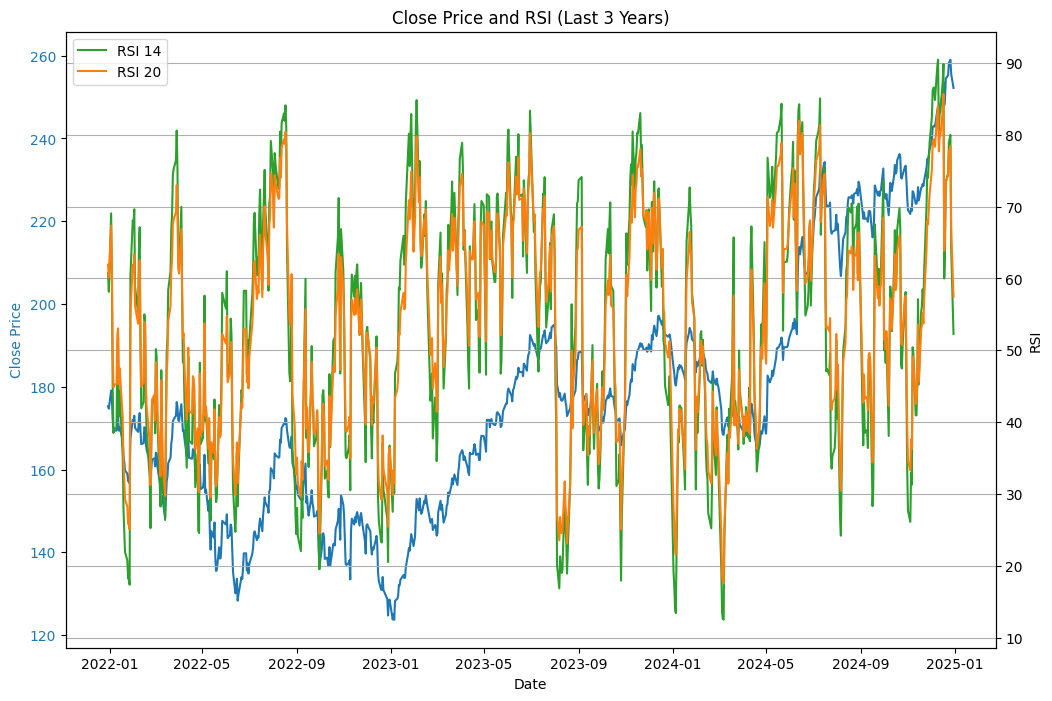

In [ ]:
last_3_years_data = AAPL_data.loc[AAPL_data.index >= AAPL_data.index.max() - pd.DateOffset(years=3)]

fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color) # Changed 'Adjusted Close Price' to 'Close Price'
ax1.plot(last_3_years_data.index, last_3_years_data['Close'], color=color) # Changed 'Adj Close' to 'Close'
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.plot(last_3_years_data.index, last_3_years_data['RSI_14'], color=color, label='RSI 14')

color = 'tab:orange'
ax2.plot(last_3_years_data.index, last_3_years_data['RSI_20'], color=color, label='RSI 20')

ax2.set_ylabel('RSI', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Close Price and RSI (Last 3 Years)') # Changed 'Adjusted Close Price' to 'Close Price'
plt.grid(True)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

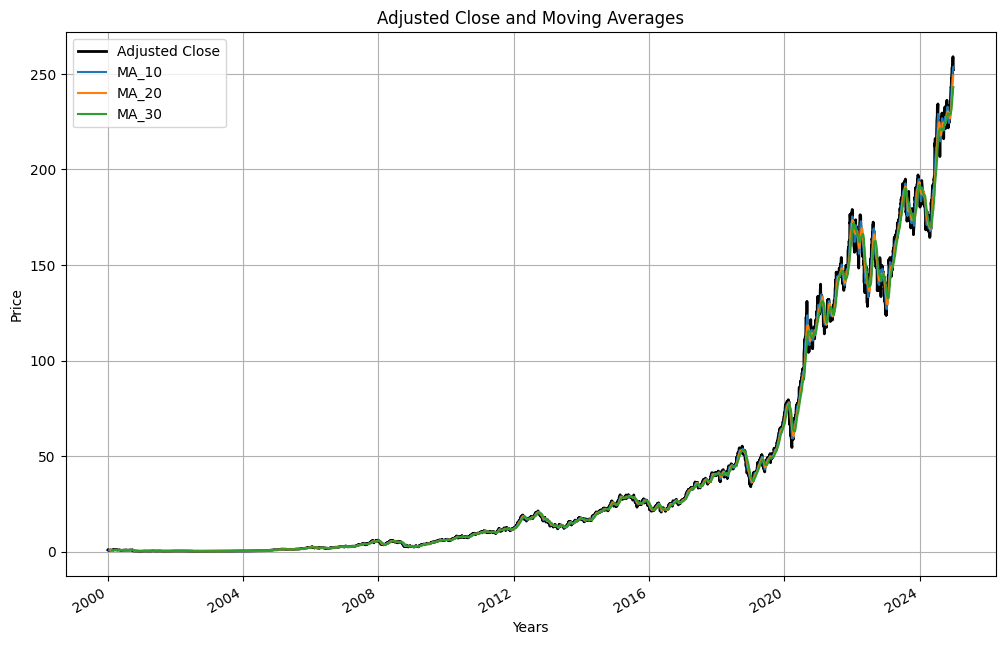

In [ ]:
# calculating moving averages EMA 10, EMA 20 and EMA 30
def plot_combined_with_adj_close(figsize, data, columns, adj_close_column):
    plt.figure(figsize=figsize)

    # Check if 'Adj Close' exists, if not, try 'Close'
    if 'Adj Close' in data.columns:
        adj_close_column = 'Adj Close'
    elif 'Close' in data.columns:
        adj_close_column = 'Close' # Use 'Close' if 'Adj Close' is missing
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' columns found in the DataFrame.")

    data[adj_close_column].plot(label="Adjusted Close", color="black", linewidth=2)

    for column in columns:
        if column not in data.columns:
            window = int(column.split('_')[1])
            data[column] = data[adj_close_column].rolling(window=window).mean()

        data[column].plot(label=column)

    plt.xlabel("Years")
    plt.ylabel("Price")
    plt.title("Adjusted Close and Moving Averages")
    plt.legend()
    plt.grid()
    plt.show()

moving_average_columns = ['MA_10', 'MA_20', 'MA_30']

plot_combined_with_adj_close(
    figsize=(12, 8),
    data=AAPL_data,
    columns=moving_average_columns,
    adj_close_column='Adj Close'  # Still pass 'Adj Close', but it will be handled inside the function
)

In [ ]:
# calculating moving averages EMA 10, EMA 20 and EMA 30
def plot_combined_with_adj_close(figsize, data, columns, adj_close_column):
    plt.figure(figsize=figsize)

    data[adj_close_column].plot(label="Adjusted Close", color="black", linewidth=2)

    for column in columns:
        if column not in data.columns:
            window = int(column.split('_')[1])
            data[column] = data[adj_close_column].rolling(window=window).mean()

        data[column].plot(label=column)

    plt.xlabel("Years")
    plt.ylabel("Price")
    plt.title("Adjusted Close and Moving Averages")
    plt.legend()
    plt.grid()
    plt.show()

moving_average_columns = ['MA_10', 'MA_20', 'MA_30']

plot_combined_with_adj_close(
    figsize=(12, 8),
    data=AAPL_data,
    columns=moving_average_columns,
    adj_close_column='Adj Close'
)

KeyError: 'Adj Close'

<Figure size 1200x800 with 0 Axes>

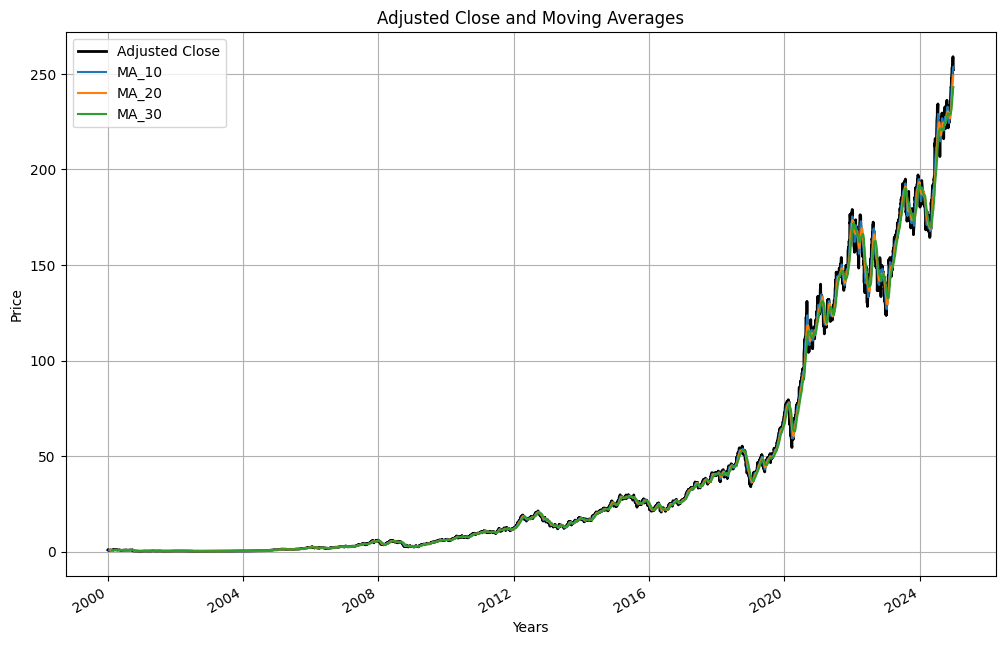

In [ ]:
# calculating moving averages EMA 10, EMA 20 and EMA 30
def plot_combined_with_adj_close(figsize, data, columns, adj_close_column):
    plt.figure(figsize=figsize)

    # Check if 'Adj Close' exists, if not, try 'Close'
    if 'Adj Close' in data.columns:
        adj_close_column = 'Adj Close'
    elif 'Close' in data.columns:
        adj_close_column = 'Close' # Use 'Close' if 'Adj Close' is missing
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' columns found in the DataFrame.")

    data[adj_close_column].plot(label="Adjusted Close", color="black", linewidth=2)

    for column in columns:
        if column not in data.columns:
            window = int(column.split('_')[1])
            data[column] = data[adj_close_column].rolling(window=window).mean()

        data[column].plot(label=column)

    plt.xlabel("Years")
    plt.ylabel("Price")
    plt.title("Adjusted Close and Moving Averages")
    plt.legend()
    plt.grid()
    plt.show()

moving_average_columns = ['MA_10', 'MA_20', 'MA_30']

plot_combined_with_adj_close(
    figsize=(12, 8),
    data=AAPL_data,
    columns=moving_average_columns,
    adj_close_column='Adj Close'  # Still pass 'Adj Close', but it will be handled inside the function
)

In [ ]:
print(AAPL_data.head(50))

               Close      High       Low      Open      Volume     RSI_10  \
Date                                                                        
2000-01-03  0.843076  0.847313  0.765877  0.789884   535796800        NaN   
2000-01-04  0.771997  0.833191  0.762111  0.815304   512377600   0.000000   
2000-01-05  0.783293  0.832720  0.775762  0.781411   778321600  16.265423   
2000-01-06  0.715508  0.805889  0.715508  0.799299   767972800   7.417406   
2000-01-07  0.749402  0.760699  0.719275  0.726806   460734400  30.516291   
2000-01-10  0.736221  0.770113  0.713626  0.768230   505064000  27.281153   
2000-01-11  0.698563  0.748460  0.681617  0.722570   441548800  19.910232   
2000-01-12  0.656668  0.719275  0.651489  0.715509   976068800  14.560964   
2000-01-13  0.728689  0.743752  0.696680  0.711625  1032684800  45.389145   
2000-01-14  0.756462  0.770113  0.748460  0.753167   390376000  53.326542   
2000-01-18  0.782823  0.798358  0.756462  0.760699   459177600  60.060677   

In [ ]:
# calculate MACD Indicator
def calculate_MACD(data, short_window=12, long_window=26, signal_window=9):
    """
    Calculate the MACD and MACD Signal Line.

    :param data: A pandas DataFrame with an 'Adj Close' column.
    :param short_window: The short EMA window (default=12).
    :param long_window: The long EMA window (default=26).
    :param signal_window: The signal EMA window (default=9).
    :return: The DataFrame with MACD and Signal Line columns added.
    """
    # Calculate short-term EMA (12-day EMA)
    data['MACD'] = data['Adj Close'].ewm(span=short_window, adjust=False).mean() - \
                   data['Adj Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate Signal Line (9-day EMA of MACD)
    data['MACD_Signal'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    return data

# Calculate MACD and Signal Line
AAPL_data = calculate_MACD(AAPL_data)

def plot_MACD_with_adj_close(figsize, data, adj_close_column, macd_column, signal_column):
    plt.figure(figsize=figsize)

    data[adj_close_column].plot(label="Adjusted Close", color="black", linewidth=2)

    data[macd_column].plot(label="MACD", color="blue")

    data[signal_column].plot(label="MACD Signal", color="red")

    plt.xlabel("Years")
    plt.ylabel("Price/MACD")
    plt.title("Adjusted Close and MACD (12, 26, 9)")
    plt.legend()
    plt.grid()
    plt.show()

plot_MACD_with_adj_close(
    figsize=(12, 8),
    data=AAPL_data,
    adj_close_column='Adj Close',
    macd_column='MACD',
    signal_column='MACD_Signal'
)


KeyError: 'Adj Close'

In [ ]:
# calculate MACD Indicator
def calculate_MACD(data, short_window=12, long_window=26, signal_window=9):
    """
    Calculate the MACD and MACD Signal Line.

    :param data: A pandas DataFrame with a 'Close' column (or 'Adj Close' if available).
    :param short_window: The short EMA window (default=12).
    :param long_window: The long EMA window (default=26).
    :param signal_window: The signal EMA window (default=9).
    :return: The DataFrame with MACD and Signal Line columns added.
    """
    # Use 'Close' column if 'Adj Close' is not available
    price_column = 'Adj Close' if 'Adj Close' in data.columns else 'Close'

    # Calculate short-term EMA (12-day EMA)
    data['MACD'] = data[price_column].ewm(span=short_window, adjust=False).mean() - \
                   data[price_column].ewm(span=long_window, adjust=False).mean()

    # Calculate Signal Line (9-day EMA of MACD)
    data['MACD_Signal'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    return data

# Calculate MACD and Signal Line
AAPL_data = calculate_MACD(AAPL_data)

# ... (rest of your code) ...

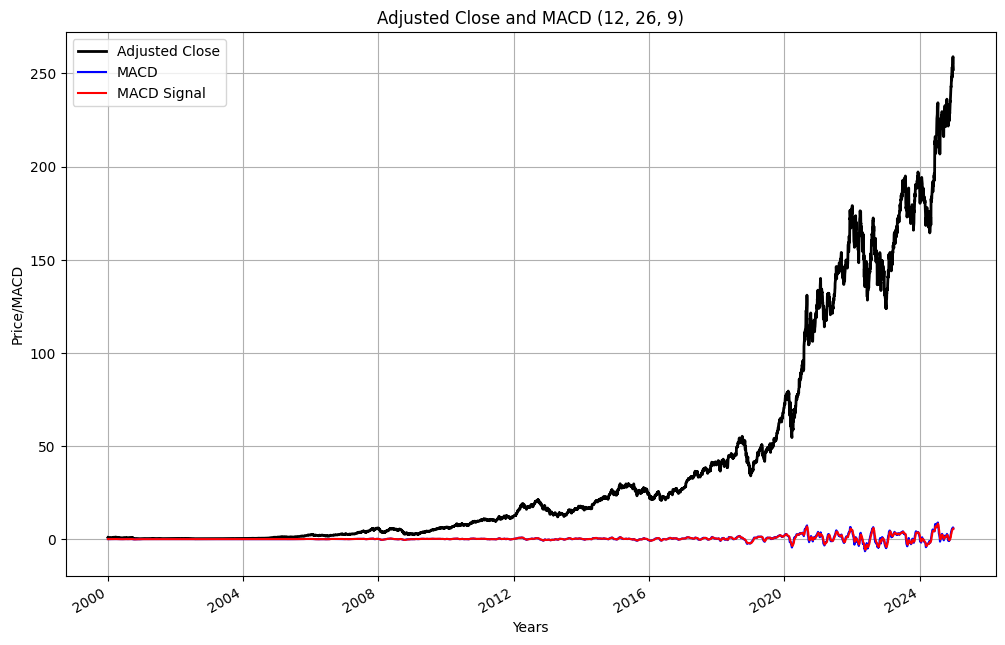

In [ ]:
# calculate MACD Indicator
def calculate_MACD(data, short_window=12, long_window=26, signal_window=9):
    """
    Calculate the MACD and MACD Signal Line.

    :param data: A pandas DataFrame with a 'Close' column (or 'Adj Close' if available).
    :param short_window: The short EMA window (default=12).
    :param long_window: The long EMA window (default=26).
    :param signal_window: The signal EMA window (default=9).
    :return: The DataFrame with MACD and Signal Line columns added.
    """
    # Use 'Close' column if 'Adj Close' is not available
    price_column = 'Adj Close' if 'Adj Close' in data.columns else 'Close'

    # Calculate short-term EMA (12-day EMA)
    data['MACD'] = data[price_column].ewm(span=short_window, adjust=False).mean() - \
                   data[price_column].ewm(span=long_window, adjust=False).mean()

    # Calculate Signal Line (9-day EMA of MACD)
    data['MACD_Signal'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    return data

# Calculate MACD and Signal Line
AAPL_data = calculate_MACD(AAPL_data)

def plot_MACD_with_adj_close(figsize, data, adj_close_column, macd_column, signal_column):
    plt.figure(figsize=figsize)

    # Use 'Close' column for plotting if 'Adj Close' is not available
    price_column = 'Adj Close' if 'Adj Close' in data.columns else 'Close'
    data[price_column].plot(label="Adjusted Close", color="black", linewidth=2)

    data[macd_column].plot(label="MACD", color="blue")

    data[signal_column].plot(label="MACD Signal", color="red")

    plt.xlabel("Years")
    plt.ylabel("Price/MACD")
    plt.title("Adjusted Close and MACD (12, 26, 9)")
    plt.legend()
    plt.grid()
    plt.show()

plot_MACD_with_adj_close(
    figsize=(12, 8),
    data=AAPL_data,
    adj_close_column='Adj Close',  # Keep this for consistency, but it will be handled in the function
    macd_column='MACD',
    signal_column='MACD_Signal'
)

In [ ]:
# Calculating ATR
def calculate_ATR(data, window=14):

    # Calculate True Range (TR)
    high_low = data['High'] - data['Low']
    # Check if 'Adj Close' exists, if not, use 'Close'
    close_col = 'Adj Close' if 'Adj Close' in data.columns else 'Close'
    high_close = abs(data['High'] - data[close_col].shift(1))
    low_close = abs(data['Low'] - data[close_col].shift(1))

    # True Range is the maximum of the above three
    true_range = high_low.to_frame(name='High-Low')
    true_range['High-Close'] = high_close
    true_range['Low-Close'] = low_close
    true_range = true_range.max(axis=1)

    # Calculate ATR
    data['ATR'] = true_range.rolling(window=window).mean()

    return data

# ATR for 14 days
AAPL_data = calculate_ATR(AAPL_data)

# ... (rest of your code remains unchanged)
def plot_ATR_with_adj_close(figsize, data, adj_close_column, atr_column):
    plt.figure(figsize=figsize)

    data[adj_close_column].plot(label="Adjusted Close", color="black", linewidth=2)

    data[atr_column].plot(label="ATR (14 Days)", color="orange")

    plt.xlabel("Years")
    plt.ylabel("Price / ATR")
    plt.title("Adjusted Close and ATR (14 Days)")
    plt.legend()
    plt.grid()
    plt.show()

plot_ATR_with_adj_close(
    figsize=(12, 8),
    data=AAPL_data,
    adj_close_column='Adj Close',
    atr_column='ATR'
)

KeyError: 'Adj Close'

<Figure size 1200x800 with 0 Axes>

[*********************100%***********************]  1 of 1 completed


Data saved to AAPL_stock_data.csv
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2000-01-03  0.843076  0.847313  0.765877  0.789884  535796800
2000-01-04  0.771997  0.833191  0.762111  0.815304  512377600
2000-01-05  0.783293  0.832720  0.775762  0.781411  778321600
2000-01-06  0.715508  0.805889  0.715508  0.799299  767972800
2000-01-07  0.749402  0.760699  0.719275  0.726806  460734400
File saved as updated_AAPL_stock_data.csv
         Date     Close      High       Low      Open     Volume
0  2000-01-03  0.843076  0.847313  0.765877  0.789884  535796800
1  2000-01-04  0.771997  0.833191  0.762111  0.815304  512377600
2  2000-01-05  0.783293  0.832720  0.775762  0.781411  778321600
3  2000-01-06  0.715508  0.805889  0.715508  0.799299  767972800
4  2000-01-07  0.749402  0.760699  0.719275  0.726806  460734400
File saved as AAPL_stock_data_with_dat

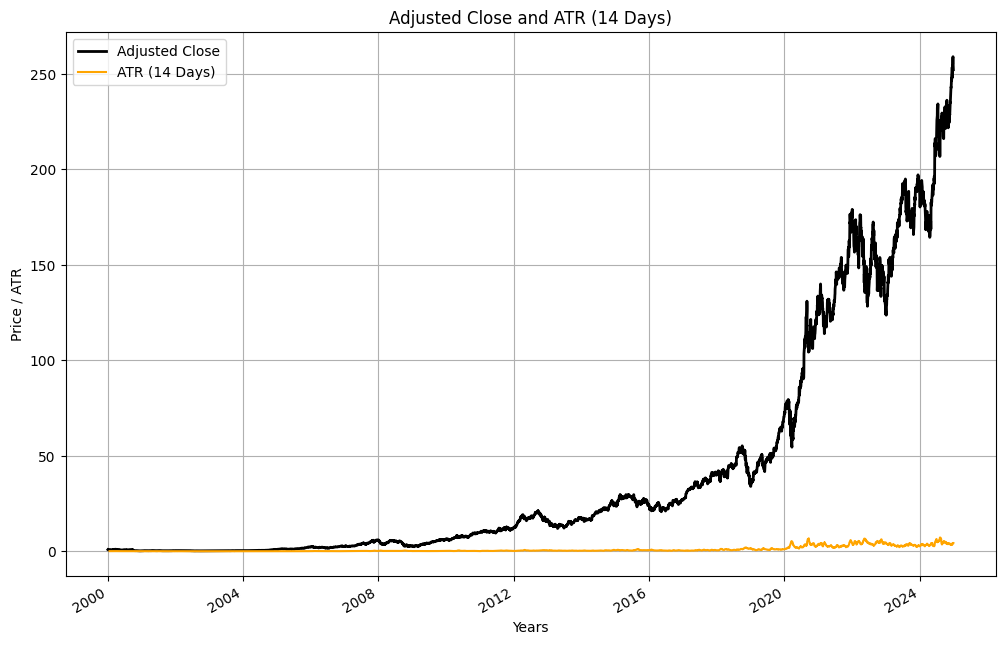

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# stock ticker and the date range
ticker = 'AAPL'
start_date = '2000-01-01'
end_date = '2024-12-31'

# Downloading stock data using yfinance
AAPL_data = yf.download(ticker, start=start_date, end=end_date)

AAPL_data.to_csv('AAPL_stock_data.csv')

print("Data saved to AAPL_stock_data.csv")

# %%
print(AAPL_data.head())

# %%

# Load the CSV file
file_path = 'AAPL_stock_data.csv'  # Updated file path
data = pd.read_csv(file_path)

data = data.drop([0, 1])

data.columns = ['Date'] + list(data.columns[1:])

modified_file_path = 'updated_AAPL_stock_data.csv'
data.to_csv(modified_file_path, index=False)

print(f"File saved as {modified_file_path}")

updated_AAPL_stock_data = pd.read_csv(modified_file_path)

print(updated_AAPL_stock_data.head())

# %%

file_path = 'updated_AAPL_stock_data.csv'  # Updated file path
AAPL_data = pd.read_csv(file_path)

# Set the "Date" column as the index
AAPL_data.set_index('Date', inplace=True)


modified_file_path = 'AAPL_stock_data_with_date_index.csv'
AAPL_data.to_csv(modified_file_path)

print(f"File saved as {modified_file_path}")

# ... (Data Visualization) ...

# Feature Engineering

def calculate_RSI(data, window=14, price_column='Close'):
    delta = data[price_column].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.ewm(span=window, min_periods=1, adjust=False).mean()
    avg_loss = loss.ewm(span=window, min_periods=1, adjust=False).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

file_path = 'AAPL_stock_data_with_date_index.csv'
AAPL_data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

AAPL_data['RSI_10'] = calculate_RSI(AAPL_data, window=10, price_column='Close')
AAPL_data['RSI_14'] = calculate_RSI(AAPL_data, window=14, price_column='Close')
AAPL_data['RSI_20'] = calculate_RSI(AAPL_data, window=20, price_column='Close')

output_file = 'AAPL_stock_data_TI_with_TIs.csv'
AAPL_data.to_csv(output_file)

print(f"RSI (10-day, 14-day, and 20-day) added and saved to {output_file}")

# ... (Moving Averages and MACD) ...

# Calculating ATR
def calculate_ATR(data, window=14):
    high_low = data['High'] - data['Low']
    # Check if 'Adj Close' exists, if not, use 'Close'
    close_col = 'Adj Close' if 'Adj Close' in data.columns else 'Close'
    high_close = abs(data['High'] - data[close_col].shift(1))
    low_close = abs(data['Low'] - data[close_col].shift(1))

    true_range = high_low.to_frame(name='High-Low')
    true_range['High-Close'] = high_close
    true_range['Low-Close'] = low_close
    true_range = true_range.max(axis=1)

    data['ATR'] = true_range.rolling(window=window).mean()
    return data

AAPL_data = calculate_ATR(AAPL_data)

def plot_ATR_with_adj_close(figsize, data, adj_close_column, atr_column):
    plt.figure(figsize=figsize)

    # Check for 'Adj Close' or 'Close'
    if 'Adj Close' in data.columns:
        adj_close_column = 'Adj Close'
    elif 'Close' in data.columns:
        adj_close_column = 'Close'  # Use 'Close' if missing
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' found.")

    data[adj_close_column].plot(label="Adjusted Close", color="black", linewidth=2)
    data[atr_column].plot(label="ATR (14 Days)", color="orange")

    plt.xlabel("Years")
    plt.ylabel("Price / ATR")
    plt.title("Adjusted Close and ATR (14 Days)")
    plt.legend()
    plt.grid()
    plt.show()

plot_ATR_with_adj_close(figsize=(12, 8), data=AAPL_data, adj_close_column='Adj Close', atr_column='ATR')

# ... (Bollinger Bands, OBV, Pivot Points) ...

In [ ]:
# Calculating ATR
def calculate_ATR(data, window=14):

    # Calculate True Range (TR)
    high_low = data['High'] - data['Low']
    high_close = abs(data['High'] - data['Adj Close'].shift(1))
    low_close = abs(data['Low'] - data['Adj Close'].shift(1))

    # True Range is the maximum of the above three
    true_range = high_low.to_frame(name='High-Low')
    true_range['High-Close'] = high_close
    true_range['Low-Close'] = low_close
    true_range = true_range.max(axis=1)

    # Calculate ATR
    data['ATR'] = true_range.rolling(window=window).mean()

    return data

# ATR for 14 days
AAPL_data = calculate_ATR(AAPL_data)

def plot_ATR_with_adj_close(figsize, data, adj_close_column, atr_column):
    plt.figure(figsize=figsize)

    data[adj_close_column].plot(label="Adjusted Close", color="black", linewidth=2)

    data[atr_column].plot(label="ATR (14 Days)", color="orange")

    plt.xlabel("Years")
    plt.ylabel("Price / ATR")
    plt.title("Adjusted Close and ATR (14 Days)")
    plt.legend()
    plt.grid()
    plt.show()

plot_ATR_with_adj_close(
    figsize=(12, 8),
    data=AAPL_data,
    adj_close_column='Adj Close',
    atr_column='ATR'
)


KeyError: 'Adj Close'

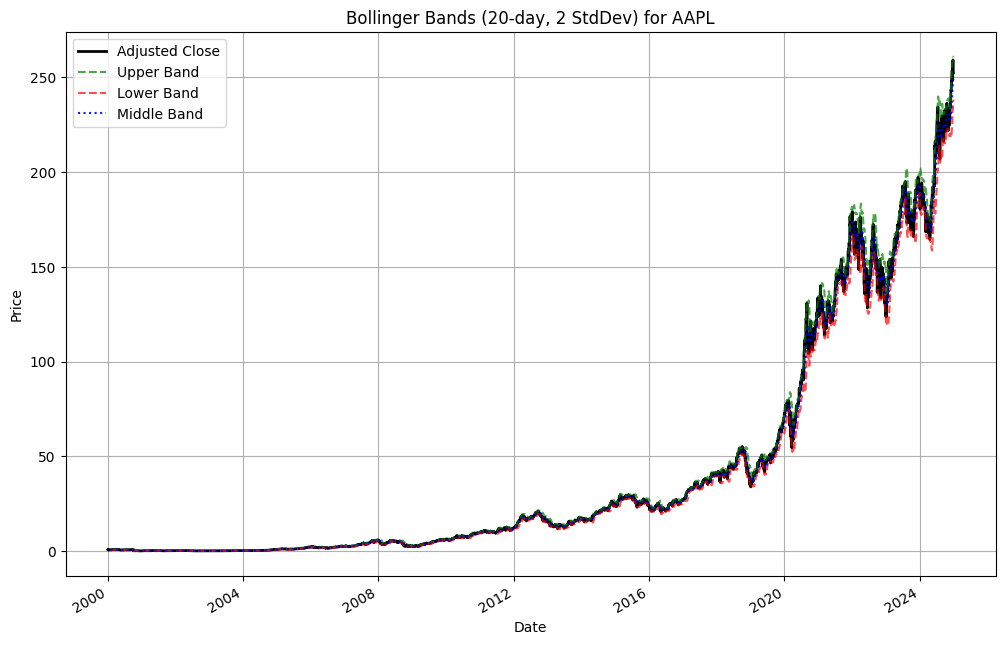

In [ ]:
#Calculating Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    """
    Calculate Bollinger Bands (Upper, Lower, and Middle).

    :param data: A pandas DataFrame with an 'Adj Close' column.
    :param window: The look-back period for the moving average (default=20).
    :param num_std_dev: Number of standard deviations for the bands (default=2).
    :return: The DataFrame with Bollinger Bands columns added.
    """
    if 'Adj Close' not in data.columns:
        raise ValueError("DataFrame must contain 'Adj Close' column.")

    # Calculate the 20-day Moving Average (Middle Band)
    data['BB_Middle'] = data['Adj Close'].rolling(window=window).mean()

    # Calculate the standard deviation
    data['BB_StdDev'] = data['Adj Close'].rolling(window=window).std()

    # Calculate Upper and Lower Bands
    data['BB_Upper'] = data['BB_Middle'] + (num_std_dev * data['BB_StdDev'])
    data['BB_Lower'] = data['BB_Middle'] - (num_std_dev * data['BB_StdDev'])

    return data

# Calculate Bollinger Bands (20-day, 2 standard deviations) for AAPL_data
AAPL_data = calculate_bollinger_bands(AAPL_data)

def plot_bollinger_bands(data, adj_close_column='Adj Close', upper_band='BB_Upper',
                         lower_band='BB_Lower', middle_band='BB_Middle', figsize=(12, 8)):

    required_columns = [adj_close_column, upper_band, lower_band, middle_band]
    if not all(col in data.columns for col in required_columns):
        raise ValueError("DataFrame is missing required columns for plotting.")

    plt.figure(figsize=figsize)
    data[adj_close_column].plot(label="Adjusted Close", color="black", linewidth=2)
    data[upper_band].plot(label="Upper Band", color="green", linestyle="--", alpha=0.7)
    data[lower_band].plot(label="Lower Band", color="red", linestyle="--", alpha=0.7)
    data[middle_band].plot(label="Middle Band", color="blue", linestyle=":", alpha=0.9)

    plt.title("Bollinger Bands (20-day, 2 StdDev) for AAPL")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

plot_bollinger_bands(
    data=AAPL_data,
    adj_close_column='Adj Close',
    upper_band='BB_Upper',
    lower_band='BB_Lower',
    middle_band='BB_Middle',
    figsize=(12, 8)
)


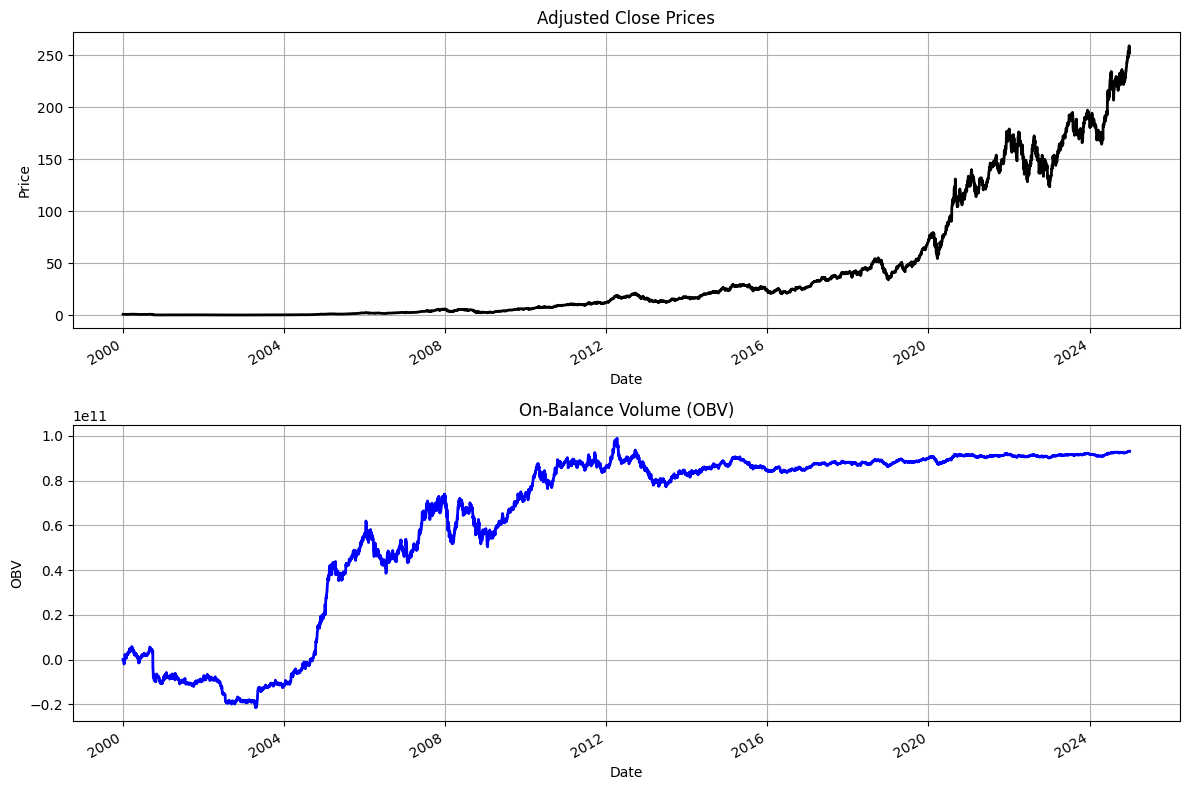

In [ ]:
#Calculating OBV
def calculate_obv(data, close_col='Adj Close', volume_col='Volume'):

    if close_col not in data.columns or volume_col not in data.columns:
        raise ValueError("DataFrame must contain 'Adj Close' and 'Volume' columns.")

    obv = [0]
    for i in range(1, len(data)):
        if data[close_col].iloc[i] > data[close_col].iloc[i - 1]:
            obv.append(obv[-1] + data[volume_col].iloc[i])
        elif data[close_col].iloc[i] < data[close_col].iloc[i - 1]:
            obv.append(obv[-1] - data[volume_col].iloc[i])
        else:
            obv.append(obv[-1])

    data['OBV'] = obv
    return data

# Calculate OBV for AAPL_data
AAPL_data = calculate_obv(AAPL_data)

def plot_obv(data, close_col='Adj Close', obv_col='OBV', figsize=(12, 8)):

    if close_col not in data.columns or obv_col not in data.columns:
        raise ValueError("DataFrame must contain specified columns for plotting.")

    plt.figure(figsize=figsize)

    plt.subplot(2, 1, 1)
    data[close_col].plot(color="black", linewidth=2)
    plt.title("Adjusted Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid()

    plt.subplot(2, 1, 2)
    data[obv_col].plot(color="blue", linewidth=2)
    plt.title("On-Balance Volume (OBV)")
    plt.xlabel("Date")
    plt.ylabel("OBV")
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot OBV for AAPL_data
plot_obv(AAPL_data, close_col='Adj Close', obv_col='OBV', figsize=(12, 8))


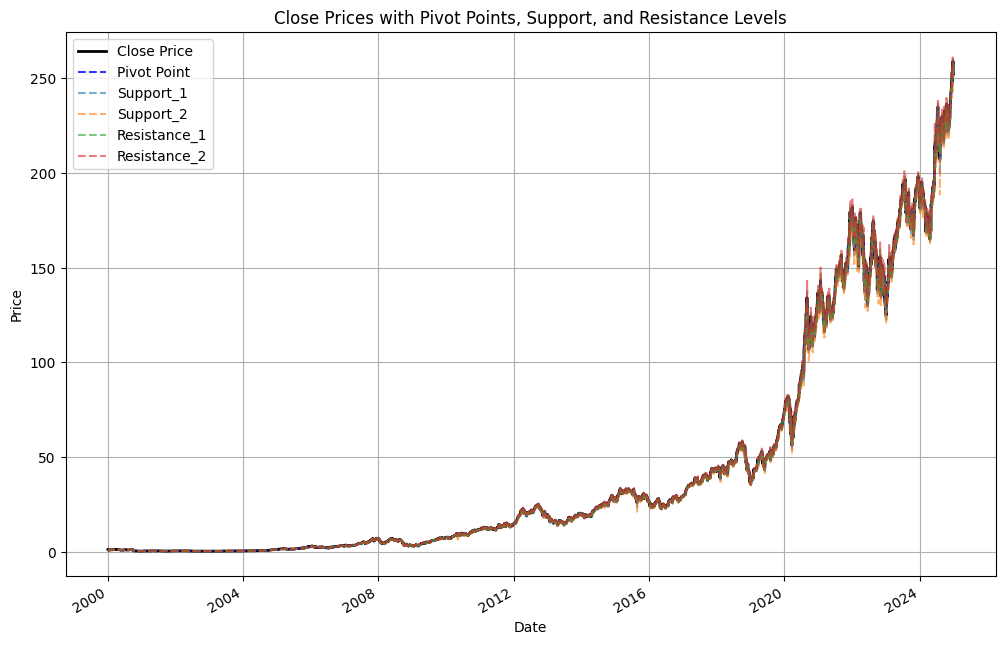

In [ ]:
def calculate_pivot_points(data, high_col='High', low_col='Low', close_col='Close'):

    if not {high_col, low_col, close_col}.issubset(data.columns):
        raise ValueError("DataFrame must contain 'High', 'Low', and 'Close' columns.")

    data['Pivot'] = (data[high_col].shift(1) + data[low_col].shift(1) + data[close_col].shift(1)) / 3
    data['Support_1'] = (2 * data['Pivot']) - data[high_col].shift(1)
    data['Resistance_1'] = (2 * data['Pivot']) - data[low_col].shift(1)
    data['Support_2'] = data['Pivot'] - (data[high_col].shift(1) - data[low_col].shift(1))
    data['Resistance_2'] = data['Pivot'] + (data[high_col].shift(1) - data[low_col].shift(1))

    return data

AAPL_data = calculate_pivot_points(AAPL_data)


def plot_pivot_points(data, close_col='Close', pivot_col='Pivot', support_cols=None, resistance_cols=None, figsize=(12, 8)):

    if close_col not in data.columns or pivot_col not in data.columns:
        raise ValueError("DataFrame must contain specified columns for plotting.")

    if support_cols is None:
        support_cols = ['Support_1', 'Support_2']
    if resistance_cols is None:
        resistance_cols = ['Resistance_1', 'Resistance_2']

    plt.figure(figsize=figsize)

    data[close_col].plot(label="Close Price", color="black", linewidth=2)

    data[pivot_col].plot(label="Pivot Point", color="blue", linestyle="--", alpha=0.8)

    for col in support_cols:
        if col in data.columns:
            data[col].plot(label=col, linestyle="--", alpha=0.6)

    for col in resistance_cols:
        if col in data.columns:
            data[col].plot(label=col, linestyle="--", alpha=0.6)

    plt.title("Close Prices with Pivot Points, Support, and Resistance Levels")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

plot_pivot_points(
    data=AAPL_data,
    close_col='Close',
    pivot_col='Pivot',
    support_cols=['Support_1', 'Support_2'],
    resistance_cols=['Resistance_1', 'Resistance_2'],
    figsize=(12, 8)
)


In [ ]:
print(AAPL_data.head(60))

            Adj Close     Close      High       Low      Open      Volume  \
Date                                                                        
2000-01-03   0.843077  0.999442  1.004464  0.907924  0.936384   535796800   
2000-01-04   0.771997  0.915179  0.987723  0.903460  0.966518   512377600   
2000-01-05   0.783293  0.928571  0.987165  0.919643  0.926339   778321600   
2000-01-06   0.715509  0.848214  0.955357  0.848214  0.947545   767972800   
2000-01-07   0.749401  0.888393  0.901786  0.852679  0.861607   460734400   
2000-01-10   0.736221  0.872768  0.912946  0.845982  0.910714   505064000   
2000-01-11   0.698563  0.828125  0.887277  0.808036  0.856585   441548800   
2000-01-12   0.656668  0.778460  0.852679  0.772321  0.848214   976068800   
2000-01-13   0.728689  0.863839  0.881696  0.825893  0.843610  1032684800   
2000-01-14   0.756462  0.896763  0.912946  0.887277  0.892857   390376000   
2000-01-18   0.782823  0.928013  0.946429  0.896763  0.901786   459177600   

In [ ]:
column_names = list(AAPL_data.columns)
print(column_names)

['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'RSI_10', 'RSI_14', 'RSI_20', 'MA_10', 'MA_20', 'MA_30', 'MACD', 'MACD_Signal', 'ATR', 'BB_Middle', 'BB_StdDev', 'BB_Upper', 'BB_Lower', 'OBV', 'Pivot', 'Support_1', 'Resistance_1', 'Support_2', 'Resistance_2']


In [ ]:
columns_to_check = [
    'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
    'RSI_10', 'RSI_14', 'RSI_20', 'MA_10', 'MA_20', 'MA_30',
    'MACD', 'MACD_Signal', 'ATR', 'BB_Middle', 'BB_StdDev',
    'BB_Upper', 'BB_Lower', 'OBV', 'Pivot', 'Support_1',
    'Resistance_1', 'Support_2', 'Resistance_2'
]

# Drop rows with NaN values in the specified columns
AAPL_data_cleaned = AAPL_data.dropna(subset=columns_to_check)

print(f"Original DataFrame shape: {AAPL_data.shape}")
print(f"Cleaned DataFrame shape: {AAPL_data_cleaned.shape}")


Original DataFrame shape: (6288, 25)
Cleaned DataFrame shape: (6259, 25)


In [ ]:
AAPL_data['Direction'] = (AAPL_data['Close'].shift(-1) > AAPL_data['Close']).astype(int)

AAPL_data = AAPL_data.dropna()

print(AAPL_data['Direction'].value_counts())

print(AAPL_data.head())


Direction
1    3269
0    2990
Name: count, dtype: int64
            Adj Close     Close      High       Low      Open     Volume  \
Date                                                                       
2000-02-14   0.872262  1.034040  1.034598  0.969866  0.976004  367539200   
2000-02-15   0.896269  1.062500  1.070871  1.028460  1.029018  485744000   
2000-02-16   0.859552  1.018973  1.054688  1.001116  1.051339  378246400   
2000-02-17   0.865201  1.025670  1.031250  1.010045  1.028460  289497600   
2000-02-18   0.837899  0.993304  1.030134  0.989955  1.023438  233441600   

               RSI_10     RSI_14     RSI_20     MA_10  ...  BB_StdDev  \
Date                                                   ...              
2000-02-14  64.766163  62.520461  60.147946  0.820952  ...   0.038934   
2000-02-15  70.141861  66.770202  63.454548  0.835074  ...   0.041854   
2000-02-16  54.576638  55.637357  55.649405  0.846607  ...   0.042355   
2000-02-17  56.396244  56.912754  56.558099  0

In [ ]:
column_names = list(AAPL_data.columns)
print(column_names)

['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'RSI_10', 'RSI_14', 'RSI_20', 'MA_10', 'MA_20', 'MA_30', 'MACD', 'MACD_Signal', 'ATR', 'BB_Middle', 'BB_StdDev', 'BB_Upper', 'BB_Lower', 'OBV', 'Pivot', 'Support_1', 'Resistance_1', 'Support_2', 'Resistance_2', 'Direction']


In [ ]:
print(f"Final shape: {AAPL_data.shape}")

Final shape: (6259, 26)


In [ ]:
# Assuming the index is a DateTimeIndex
AAPL_data['Day_of_Week'] = AAPL_data.index.dayofweek  # Monday=0, Sunday=6
AAPL_data['Month'] = AAPL_data.index.month
AAPL_data['Year'] = AAPL_data.index.year
AAPL_data['Quarter'] = AAPL_data.index.quarter


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#### Final Model ####
X_direction = AAPL_data[['High', 'Low', 'Open', 'Volume', 'RSI_14',
                         'MA_10', 'MA_20', 'MACD', 'MACD_Signal', 'ATR', 'BB_Middle',
                         'BB_StdDev', 'BB_Upper', 'BB_Lower', 'OBV', 'Pivot',
                         'Support_1', 'Resistance_1', 'Support_2', 'Resistance_2',
                         'Day_of_Week', 'Month']]
y_direction = AAPL_data['Direction']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_direction, y_direction, test_size=0.2, random_state=42
)

param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [1]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train_rf, y_train_rf)

best_rf = grid_rf.best_estimator_
best_rf_accuracy = grid_rf.best_score_

AAPL_data['RF_Direction_Predictions'] = best_rf.predict(X_direction)

X_ann = AAPL_data[['High', 'Low', 'Open', 'Volume', 'RSI_14',
                         'MA_10', 'MA_20', 'MACD', 'MACD_Signal', 'ATR', 'BB_Middle',
                   'BB_StdDev', 'BB_Upper', 'BB_Lower', 'OBV', 'Pivot',
                   'Support_1', 'Resistance_1', 'Support_2', 'Resistance_2',
                   'RF_Direction_Predictions', 'Day_of_Week']]
y_ann = AAPL_data['Adj Close']


scaler_x = StandardScaler()
X_ann_scaled = scaler_x.fit_transform(X_ann)

scaler_y = MinMaxScaler()
y_ann_scaled = scaler_y.fit_transform(y_ann.values.reshape(-1, 1))

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_ann_scaled, y_ann_scaled, test_size=0.2, random_state=42
)

ann_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate='constant',
    random_state=42,
    max_iter=1000,
    early_stopping=True
)

ann_model.fit(X_train_ann, y_train_ann.ravel())

price_predictions_scaled = ann_model.predict(X_test_ann)
price_predictions = scaler_y.inverse_transform(price_predictions_scaled.reshape(-1, 1))

y_test_ann_orig = scaler_y.inverse_transform(y_test_ann)
mse = np.mean((price_predictions - y_test_ann_orig) ** 2)
print(f"Improved ANN Mean Squared Error: {mse:.2f}")

Improved ANN Mean Squared Error: 1.67


In [ ]:
import yfinance as yf
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
print(data.head())


In [ ]:
import gradio as gr
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import tempfile  # For temporary file handling

# Define helper functions for technical indicators
def calculate_RSI(data, window=14):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.ewm(span=window, adjust=False).mean()
    avg_loss = loss.ewm(span=window, adjust=False).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def download_stock_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            return None, f"No data available for ticker '{ticker}' in the given date range."
        return data, None
    except Exception as e:
        return None, f"Error downloading data: {str(e)}"

def save_plot_to_file(data, title, ylabel, color='blue'):
    """Saves the plot to a temporary file and returns the file path."""
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
    plt.figure(figsize=(10, 5))
    data.plot(title=title, color=color)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.grid()
    plt.savefig(temp_file.name, format='png')
    plt.close()
    return temp_file.name

def stock_analysis(ticker, start_date, end_date, analysis_type):
    data, error = download_stock_data(ticker, start_date, end_date)
    if error:
        return None, None, error  # Return error message

    # Perform analysis based on user selection
    if analysis_type == "Adjusted Close Price":
        plot_path = save_plot_to_file(data['Adj Close'], "Adjusted Close Price", "Price", color='blue')
        csv_path = tempfile.NamedTemporaryFile(delete=False, suffix='.csv').name
        data.to_csv(csv_path)
        return csv_path, plot_path, "Analysis completed."
    elif analysis_type == "RSI (14-Day)":
        data['RSI'] = calculate_RSI(data)
        plot_path = save_plot_to_file(data['RSI'], "RSI (14-Day)", "RSI", color='green')
        csv_path = tempfile.NamedTemporaryFile(delete=False, suffix='.csv').name
        data.to_csv(csv_path)
        return csv_path, plot_path, "Analysis completed."
    else:
        return None, None, "Unknown analysis type."

# Gradio interface function
def gradio_interface(ticker, start_date, end_date, analysis_type):
    csv_file, plot_file, message = stock_analysis(ticker, start_date, end_date, analysis_type)
    if not csv_file or not plot_file:
        return None, None, message
    return csv_file, plot_file, message

# Gradio Interface
interface = gr.Interface(
    fn=gradio_interface,
    inputs=[
        gr.Textbox(label="Stock Ticker", placeholder="e.g., AAPL"),
        gr.Textbox(label="Start Date (YYYY-MM-DD)", placeholder="e.g., 2000-01-01"),
        gr.Textbox(label="End Date (YYYY-MM-DD)", placeholder="e.g., 2023-12-31"),
        gr.Radio(label="Analysis Type", choices=["Adjusted Close Price", "RSI (14-Day)"]),
    ],
    outputs=[
        gr.File(label="Download Data (CSV)"),  # To download CSV file
        gr.File(label="Download Plot (PNG)"),  # To download plot as PNG
        gr.Textbox(label="Status"),  # Status or message output
    ],
    live=True,
    title="Stock Analysis Tool",
    description="Analyze stock performance, visualize technical indicators, and download the results.",
)

interface.launch(debug=True, share=True)


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate RSI
def calculate_RSI(data, column='Adj Close', period=14):
    if column not in data.columns:
        column = 'Close'  # Fallback to 'Close' if 'Adj Close' is not available
    delta = data[column].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

# Function to save plot
def save_plot_to_file(data, title, ylabel, color='blue'):
    plt.figure(figsize=(10, 5))
    plt.plot(data, color=color)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Date")
    plt.grid()
    plt.savefig("plot.png")
    plt.close()
    return "plot.png"

# Main stock analysis function
def stock_analysis(ticker, start_date, end_date, analysis_type):
    data = yf.download(ticker, start=start_date, end=end_date)

    # Check for 'Adj Close' column
    if 'Adj Close' not in data.columns:
        data['Adj Close'] = data['Close']

    # Perform the requested analysis
    if analysis_type == 'RSI':
        data['RSI'] = calculate_RSI(data)
        plot_path = save_plot_to_file(data['RSI'], "RSI Analysis", "RSI Value", color='green')
        return "stock_data.csv", plot_path, "RSI analysis completed successfully!"
    elif analysis_type == 'Price':
        plot_path = save_plot_to_file(data['Adj Close'], "Adjusted Close Price", "Price", color='blue')
        return "stock_data.csv", plot_path, "Price analysis completed successfully!"
    else:
        return "stock_data.csv", None, "Invalid analysis type selected."

# Example usage
csv_file, plot_file, message = stock_analysis("AAPL", "2022-01-01", "2023-01-01", "RSI")
print(message)


[*********************100%***********************]  1 of 1 completed


RSI analysis completed successfully!


In [ ]:
import yfinance as yf

ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

data = yf.download(ticker, start=start_date, end=end_date)
print(data.head())  # Verify the data contains expected columns


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076584  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803833  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100845  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227921  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395187  172.169998  174.139999  171.029999  172.889999   

Price          Volume  
Ticker           AAPL  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
!pip install yfinance

In [ ]:
# This is the main correct code for my fianl machineLearning project

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to fetch stock data and perform analysis
def stock_analysis(ticker, start_date, end_date):
    try:
        # Fetch stock data from Yahoo Finance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        if stock_data.empty:
            return f"No data found for ticker {ticker} in the specified date range.", None

        # Reset the index to access the 'Date' column
        stock_data.reset_index(inplace=True)

        # Line plot for stock's closing price
        plt.figure(figsize=(10, 5))
        plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
        plt.title(f'{ticker} Stock Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid()

        # Save the plot
        plot_path = "stock_plot.png"
        plt.savefig(plot_path)
        plt.close()

        # Prepare data for simple forecasting (using linear regression)
        stock_data['DateNumeric'] = pd.to_datetime(stock_data['Date']).map(pd.Timestamp.toordinal)
        X = stock_data[['DateNumeric']]
        y = stock_data['Close']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict future stock prices (next 30 days)
        future_dates = pd.date_range(stock_data['Date'].iloc[-1], periods=30, freq='B')
        future_dates_numeric = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
        future_predictions = model.predict(future_dates_numeric)

        # Ensure future_dates and future_predictions are 1D arrays
        future_df = pd.DataFrame({
            'Date': future_dates,
            'Predicted Close Price': future_predictions.flatten()
        })

        return future_df, plot_path

    except Exception as e:
        return f"An error occurred: {str(e)}", None

# Gradio interface function
def gradio_interface(ticker, start_date, end_date):
    future_df, plot_path = stock_analysis(ticker, start_date, end_date)

    if isinstance(future_df, str):  # Error message
        return future_df, None, None

    return "Analysis completed!", plot_path, future_df

# Define Gradio app
with gr.Blocks() as app:
    gr.Markdown("# Stock Price Prediction and Analysis App")

    with gr.Row():
        ticker_input = gr.Textbox(label="Stock Ticker", placeholder="e.g., AAPL")
        start_date_input = gr.Textbox(label="Start Date", placeholder="YYYY-MM-DD")
        end_date_input = gr.Textbox(label="End Date", placeholder="YYYY-MM-DD")

    analyze_button = gr.Button("Analyze")

    output_message = gr.Textbox(label="Message", interactive=False)
    stock_plot = gr.Image(label="Stock Closing Price Plot")
    prediction_table = gr.Dataframe(label="Future Predictions")

    analyze_button.click(
        gradio_interface,
        inputs=[ticker_input, start_date_input, end_date_input],
        outputs=[output_message, stock_plot, prediction_table]
    )

# Launch the app
app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://829b3af514977bf337.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to fetch stock data and perform analysis
def stock_analysis(ticker, start_date, end_date):
    try:
        # Fetch stock data from Yahoo Finance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        if stock_data.empty:
            return f"No data found for ticker {ticker} in the specified date range.", None

        # Reset the index to access the 'Date' column
        stock_data.reset_index(inplace=True)

        # Line plot for stock's closing price
        plt.figure(figsize=(10, 5))
        plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
        plt.title(f'{ticker} Stock Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid()

        # Save the plot
        plot_path = "stock_plot.png"
        plt.savefig(plot_path)
        plt.close()

        # Prepare data for simple forecasting (using linear regression)
        stock_data['DateNumeric'] = pd.to_datetime(stock_data['Date']).map(pd.Timestamp.toordinal)
        X = stock_data[['DateNumeric']]
        y = stock_data['Close']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict future stock prices (next 30 days)
        future_dates = pd.date_range(stock_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='B')
        future_dates_numeric = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
        future_predictions = model.predict(future_dates_numeric)

        # Create a DataFrame for future predictions
        future_df = pd.DataFrame({
            'Date': future_dates,
            'Predicted Close Price': future_predictions.flatten()
        })

        return future_df, plot_path

    except Exception as e:
        return f"An error occurred: {str(e)}", None

# Gradio interface function
def gradio_interface(ticker, start_date, end_date):
    future_df, plot_path = stock_analysis(ticker, start_date, end_date)

    if isinstance(future_df, str):  # Error message
        return future_df, None, None

    return "Analysis completed!", plot_path, future_df

# Define Gradio app
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Stock Price Prediction and Analysis App")

        with gr.Row():
            ticker_input = gr.Textbox(label="Stock Ticker", placeholder="e.g., AAPL")
            start_date_input = gr.Textbox(label="Start Date", placeholder="YYYY-MM-DD")
            end_date_input = gr.Textbox(label="End Date", placeholder="YYYY-MM-DD")

        analyze_button = gr.Button("Analyze")

        output_message = gr.Textbox(label="Message", interactive=False)
        stock_plot = gr.Image(label="Stock Closing Price Plot")
        prediction_table = gr.Dataframe(label="Future Predictions")

        analyze_button.click(
            gradio_interface,
            inputs=[ticker_input, start_date_input, end_date_input],
            outputs=[output_message, stock_plot, prediction_table]
        )

    return app

# For Hugging Face, just return the app object
if __name__ == "__main__":
    app = create_app()
    app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://72b9d39f6c96ee9ee6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd
import plotly.express as px
import gradio as gr
import numpy as np
import requests

# Function to fetch stock data using Alpha Vantage
def fetch_stock_data(ticker, start_date, end_date, api_key="demo"):
    base_url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": ticker,
        "apikey": api_key,
        "outputsize": "full",
    }
    response = requests.get(base_url, params=params)

    if response.status_code != 200:
        return None, f"Failed to fetch data: {response.reason}"

    data = response.json()

    if "Note" in data:
        return None, f"API rate limit exceeded. Please try again later or use a different API key."

    if "Time Series (Daily)" not in data:
        return None, f"Invalid data or API response: {data.get('Error Message', 'Unexpected issue occurred.')}"

    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index")
    df = df.rename(columns={"5. adjusted close": "Close"})
    df["Close"] = df["Close"].astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.loc[start_date:end_date]

    if df.empty:
        return None, "No data found for the specified date range."

    return df.sort_index(), None

# Function to perform simple linear regression and forecasting
def linear_regression_forecast(data):
    data = data.reset_index()
    data["DateNumeric"] = data["index"].map(pd.Timestamp.toordinal)

    X = data["DateNumeric"].values.reshape(-1, 1)
    y = data["Close"].values

    # Calculate slope and intercept
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    num = np.sum((X - X_mean) * (y - y_mean))
    den = np.sum((X - X_mean) ** 2)
    slope = num / den
    intercept = y_mean - slope * X_mean

    # Predict for the next 30 days
    last_date = data["index"].iloc[-1]
    future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=30, freq="B")
    future_dates_numeric = future_dates.map(pd.Timestamp.toordinal).values
    future_predictions = slope * future_dates_numeric + intercept

    future_df = pd.DataFrame({
        "Date": future_dates,
        "Predicted Close Price": future_predictions
    })

    return future_df

# Main function to fetch, analyze, and visualize stock data
def stock_analysis(ticker, start_date, end_date):
    api_key = "/content/updated_AAPL_stock_data.csv"  # Replace with your Alpha Vantage API key
    data, error = fetch_stock_data(ticker, start_date, end_date, api_key=api_key)

    if error:
        return error, None, None

    # Create plot for historical closing prices
    fig = px.line(data, x=data.index, y="Close", title=f"{ticker} Stock Closing Prices")
    plot_path = "stock_plot.html"
    fig.write_html(plot_path)

    # Perform linear regression and forecast
    future_predictions = linear_regression_forecast(data)

    return "Analysis completed!", plot_path, future_predictions

# Gradio interface function
def gradio_interface(ticker, start_date, end_date):
    message, plot_path, predictions = stock_analysis(ticker, start_date, end_date)

    if plot_path is None:
        return message, None, None

    return message, plot_path, predictions

# Define Gradio app
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Stock Price Prediction and Analysis App")

        with gr.Row():
            ticker_input = gr.Textbox(label="Stock Ticker", placeholder="e.g., AAPL")
            start_date_input = gr.Textbox(label="Start Date", placeholder="YYYY-MM-DD")
            end_date_input = gr.Textbox(label="End Date", placeholder="YYYY-MM-DD")

        analyze_button = gr.Button("Analyze")

        output_message = gr.Textbox(label="Message", interactive=False)
        stock_plot = gr.HTML(label="Stock Closing Price Plot")
        prediction_table = gr.Dataframe(label="Future Predictions")

        analyze_button.click(
            gradio_interface,
            inputs=[ticker_input, start_date_input, end_date_input],
            outputs=[output_message, stock_plot, prediction_table]
        )

    return app

# For Hugging Face, just return the app object
if __name__ == "__main__":
    app = create_app()
    app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://985ed037d9af359005.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Function to fetch stock data and perform analysis
def stock_analysis(ticker, start_date, end_date):
    try:
        # Fetch stock data from Yahoo Finance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        if stock_data.empty:
            return f"No data found for ticker {ticker} in the specified date range.", None

        # Reset the index to access the 'Date' column
        stock_data.reset_index(inplace=True)

        # Line plot for stock's closing price
        plt.figure(figsize=(10, 5))
        plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
        plt.title(f'{ticker} Stock Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid()

        # Save the plot
        plot_path = "stock_plot.png"
        plt.savefig(plot_path)
        plt.close()

        # Prepare data for forecasting (using Random Forest)
        stock_data['DateNumeric'] = pd.to_datetime(stock_data['Date']).map(pd.Timestamp.toordinal)
        X = stock_data[['DateNumeric']]
        y = stock_data['Close']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit a Random Forest Regressor model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict future stock prices (next 30 days)
        future_dates = pd.date_range(stock_data['Date'].iloc[-1], periods=30, freq='B')
        future_dates_numeric = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
        future_predictions = model.predict(future_dates_numeric)

        # Ensure future_dates and future_predictions are 1D arrays
        future_df = pd.DataFrame({
            'Date': future_dates,
            'Predicted Close Price': future_predictions.flatten()
        })

        return future_df, plot_path

    except Exception as e:
        return f"An error occurred: {str(e)}", None

# Gradio interface function
def gradio_interface(ticker, start_date, end_date):
    future_df, plot_path = stock_analysis(ticker, start_date, end_date)

    if isinstance(future_df, str):  # Error message
        return future_df, None, None

    return "Analysis completed!", plot_path, future_df

# Define Gradio app
with gr.Blocks() as app:
    gr.Markdown("# Stock Price Prediction and Analysis App")

    with gr.Row():
        ticker_input = gr.Textbox(label="Stock Ticker", placeholder="e.g., AAPL")
        start_date_input = gr.Textbox(label="Start Date", placeholder="YYYY-MM-DD")
        end_date_input = gr.Textbox(label="End Date", placeholder="YYYY-MM-DD")

    analyze_button = gr.Button("Analyze")

    output_message = gr.Textbox(label="Message", interactive=False)
    stock_plot = gr.Image(label="Stock Closing Price Plot")
    prediction_table = gr.Dataframe(label="Future Predictions")

    analyze_button.click(
        gradio_interface,
        inputs=[ticker_input, start_date_input, end_date_input],
        outputs=[output_message, stock_plot, prediction_table]
    )

# Launch the app
app.launch()


In [ ]:
  import yfinance as yf
  import pandas as pd
  import matplotlib.pyplot as plt
  import gradio as gr
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestRegressor
  import numpy as np

  # Version of the application
  __version__ = "1.0.0"

  # Function to fetch stock data and perform analysis
  def stock_analysis(ticker, start_date, end_date):
      try:
          # Fetch stock data from Yahoo Finance
          stock_data = yf.download(ticker, start=start_date, end=end_date)

          if stock_data.empty:
              return f"No data found for ticker {ticker} in the specified date range.", None

          # Reset the index to access the 'Date' column
          stock_data.reset_index(inplace=True)

          # Line plot for stock's closing price
          plt.figure(figsize=(10, 5))
          plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
          plt.title(f'{ticker} Stock Closing Price')
          plt.xlabel('Date')
          plt.ylabel('Price (USD)')
          plt.legend()
          plt.grid()

          # Save the plot
          plot_path = "stock_plot.png"
          plt.savefig(plot_path)
          plt.close()

          # Prepare data for forecasting (using Random Forest)
          stock_data['DateNumeric'] = pd.to_datetime(stock_data['Date']).map(pd.Timestamp.toordinal)
          X = stock_data[['DateNumeric']]
          y = stock_data['Close']

          # Train-test split
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

          # Fit a Random Forest Regressor model
          model = RandomForestRegressor(n_estimators=100, random_state=42)
          model.fit(X_train, y_train)

          # Predict future stock prices (next 30 days)
          future_dates = pd.date_range(stock_data['Date'].iloc[-1], periods=30, freq='B')
          future_dates_numeric = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
          future_predictions = model.predict(future_dates_numeric)

          # Ensure future_dates and future_predictions are 1D arrays
          future_df = pd.DataFrame({
              'Date': future_dates,
              'Predicted Close Price': future_predictions.flatten()
          })

          return future_df, plot_path

      except Exception as e:
          return f"An error occurred: {str(e)}", None

  # Gradio interface function
  def gradio_interface(ticker, start_date, end_date):
      future_df, plot_path = stock_analysis(ticker, start_date, end_date)

      if isinstance(future_df, str):  # Error message
          return future_df, None, None

      return "Analysis completed!", plot_path, future_df

  # Define Gradio app
  with gr.Blocks() as app:
      gr.Markdown(f"# Stock Price Prediction and Analysis App (v{__version__})")

      with gr.Row():
          ticker_input = gr.Textbox(label="Stock Ticker", placeholder="e.g., AAPL")
          start_date_input = gr.Textbox(label="Start Date", placeholder="YYYY-MM-DD")
          end_date_input = gr.Textbox(label="End Date", placeholder="YYYY-MM-DD")

      analyze_button = gr.Button("Analyze")

      output_message = gr.Textbox(label="Message", interactive=False)
      stock_plot = gr.Image(label="Stock Closing Price Plot")
      prediction_table = gr.Dataframe(label="Future Predictions")

      analyze_button.click(
          gradio_interface,
          inputs=[ticker_input, start_date_input, end_date_input],
          outputs=[output_message, stock_plot, prediction_table]
      )

  # Launch the app
  app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d4dfa69b1d38c4a772.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Import required libraries
import joblib  # For saving sklearn models
import os

# Save your trained model (replace `model` with your model variable)
joblib.dump(model, 'stock_price_model.pkl')
print("Model saved as 'stock_price_model.pkl'")

# Download the saved model to your local machine
from google.colab import files
files.download('stock_price_model.pkl')

# Push to Hugging Face (Optional)
!pip install huggingface_hub

from huggingface_hub import notebook_login, HfApi, Repository

# Log in to Hugging Face
notebook_login()

# Create a repository on Hugging Face
repo_name = "stock-price-prediction-model"
api = HfApi()
api.create_repo(repo_name, exist_ok=True)

# Clone the repository locally
repo = Repository(local_dir=repo_name, clone_from=f"https://huggingface.co/YOUR_USERNAME/{repo_name}")

# Move your model file to the repository directory
os.rename('stock_price_model.pkl', f"{repo_name}/stock_price_model.pkl")

# Push the model to the repository
repo.push_to_hub(commit_message="Upload stock price model")
print("Model pushed to Hugging Face.")


Model saved as 'stock_price_model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

HfHubHTTPError: (Request ID: Root=1-677c0ff9-725f4a9018b929645b0e05c5;6bd48858-e557-4eb5-a8e7-c1e6c5dadb79)

403 Forbidden: You don't have the rights to create a model under the namespace "Ztyiw".
Cannot access content at: https://huggingface.co/api/repos/create.
Make sure your token has the correct permissions.

In [ ]:
# Import required libraries
import joblib  # For saving sklearn models
import os
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Assuming you're using RandomForest

# Fetch stock data
ticker = 'AAPL'  # Replace with your desired ticker
start_date = '2022-01-01'  # Replace with your desired start date
end_date = '2023-01-01'  # Replace with your desired end date
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Prepare data for forecasting
stock_data.reset_index(inplace=True)
stock_data['DateNumeric'] = pd.to_datetime(stock_data['Date']).map(pd.Timestamp.toordinal)
X = stock_data[['DateNumeric']]
y = stock_data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Save your trained model
joblib.dump(model, 'stock_price_model.pkl')
print("Model saved as 'stock_price_model.pkl'")

# Download the saved model to your local machine (if using Google Colab)
#from google.colab import files
#files.download('stock_price_model.pkl')

# Push to Hugging Face (Optional) - Adapt to your Hugging Face credentials
# !pip install huggingface_hub
# from huggingface_hub import notebook_login, HfApi, Repository
# ... (rest of Hugging Face code)

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model saved as 'stock_price_model.pkl'


In [ ]:
# Import required libraries
import joblib  # For saving sklearn models
import os
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Assuming you're using RandomForest
!pip install huggingface_hub
from huggingface_hub import notebook_login, HfApi, Repository

# Fetch stock data
ticker = 'AAPL'  # Replace with your desired ticker
start_date = '2022-01-01'  # Replace with your desired start date
end_date = '2023-01-01'  # Replace with your desired end date
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Prepare data for forecasting
stock_data.reset_index(inplace=True)
stock_data['DateNumeric'] = pd.to_datetime(stock_data['Date']).map(pd.Timestamp.toordinal)
X = stock_data[['DateNumeric']]
y = stock_data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save your trained model
joblib.dump(model, 'stock_price_model.pkl')
print("Model saved as 'stock_price_model.pkl'")

# Download the saved model to your local machine (if using Google Colab)
# from google.colab import files
# files.download('stock_price_model.pkl')

# --- Hugging Face Model Pushing ---

# Log in to Hugging Face (only needed once)
notebook_login()

# Define repository name and create it if it doesn't exist
repo_name = "stock-price-prediction-model"  # Choose your repo name
api = HfApi()
api.create_repo(repo_id=repo_name, private=True, exist_ok=True) # Create a private repo

# Clone the repository locally
repo = Repository(local_dir=repo_name, clone_from=f"https://huggingface.co/YOUR_USERNAME/{repo_name}")

# Move the model file to the repository directory
os.replace('stock_price_model.pkl', f"{repo_name}/stock_price_model.pkl")

# Push the model to the repository
repo.push_to_hub(commit_message="Upload stock price model")
print(f"Model pushed to Hugging Face: https://huggingface.co/YOUR_USERNAME/{repo_name}")

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model saved as 'stock_price_model.pkl'


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


HfHubHTTPError: 401 Client Error: Unauthorized for url: https://huggingface.co/api/repos/create (Request ID: Root=1-677c0f39-206f16bc3206e9aa2873fdf2;aa04479b-5399-4d1c-af62-3a7ad7d80364)

Invalid username or password.

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Function to fetch stock data and perform analysis
def stock_analysis(ticker, start_date, end_date):
    try:
        # Fetch stock data from Yahoo Finance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        if stock_data.empty:
            return f"No data found for ticker {ticker} in the specified date range.", None

        # Reset the index to access the 'Date' column
        stock_data.reset_index(inplace=True)

        # Add additional features
        stock_data['DateNumeric'] = pd.to_datetime(stock_data['Date']).map(pd.Timestamp.toordinal)
        stock_data['DayOfWeek'] = stock_data['Date'].dt.dayofweek
        stock_data['Month'] = stock_data['Date'].dt.month
        stock_data['Year'] = stock_data['Date'].dt.year
        stock_data['MA10'] = stock_data['Close'].rolling(window=10).mean()
        stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
        stock_data = stock_data.dropna()  # Drop rows with NaN values (from moving averages)

        # Prepare data for forecasting
        features = ['DateNumeric', 'DayOfWeek', 'Month', 'Year', 'MA10', 'MA20']
        X = stock_data[features]
        y = stock_data['Close']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit a Random Forest Regressor model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict future stock prices (next 30 days)
        future_dates = pd.date_range(stock_data['Date'].iloc[-1], periods=30, freq='B')
        future_data = pd.DataFrame({
            'Date': future_dates,
            'DateNumeric': future_dates.map(pd.Timestamp.toordinal),
            'DayOfWeek': future_dates.dayofweek,
            'Month': future_dates.month,
            'Year': future_dates.year,
        })
        future_data['MA10'] = stock_data['MA10'].iloc[-1]  # Use the last available moving average
        future_data['MA20'] = stock_data['MA20'].iloc[-1]

        future_predictions = model.predict(future_data[features])

        # Create a DataFrame for future predictions
        future_df = pd.DataFrame({
            'Date': future_dates,
            'Predicted Close Price': future_predictions.flatten()
        })

        # Line plot for stock's closing price
        plt.figure(figsize=(10, 5))
        plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
        plt.title(f'{ticker} Stock Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid()

        # Save the plot
        plot_path = "stock_plot.png"
        plt.savefig(plot_path)
        plt.close()

        return future_df, plot_path

    except Exception as e:
        return f"An error occurred: {str(e)}", None

# Gradio interface function
def gradio_interface(ticker, start_date, end_date):
    future_df, plot_path = stock_analysis(ticker, start_date, end_date)

    if isinstance(future_df, str):  # Error message
        return future_df, None, None

    return "Analysis completed!", plot_path, future_df

# Define Gradio app
with gr.Blocks() as app:
    gr.Markdown("# Stock Price Prediction and Analysis App")

    with gr.Row():
        ticker_input = gr.Textbox(label="Stock Ticker", placeholder="e.g., AAPL")
        start_date_input = gr.Textbox(label="Start Date", placeholder="YYYY-MM-DD")
        end_date_input = gr.Textbox(label="End Date", placeholder="YYYY-MM-DD")

    analyze_button = gr.Button("Analyze")

    output_message = gr.Textbox(label="Message", interactive=False)
    stock_plot = gr.Image(label="Stock Closing Price Plot")
    prediction_table = gr.Dataframe(label="Future Predictions")

    analyze_button.click(
        gradio_interface,
        inputs=[ticker_input, start_date_input, end_date_input],
        outputs=[output_message, stock_plot, prediction_table]
    )

# Launch the app
app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://010edae61e42e77558.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# prompt: randomly select 5 items from a list

import random

my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
random_items = random.sample(my_list, 5)
random_items

[9, 1, 10, 6, 3]